In [231]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [232]:
df = pd.read_csv('iris.csv')
df
#df = 150 rows and 5 columns

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [233]:
# To take it further, if you use pandas method drop, to remove columns or rows, if you specify axis=1 
# you will be removing columns. If you specify axis=0 you will be removing rows from dataset.

In [234]:
target = df['species']

In [235]:
s = set()
for val in target:
    s.add(val)
s = list(s)
s                                                #outputs the categories

['versicolor', 'virginica', 'setosa']

In [236]:
x = df['sepal_length']
y = df['petal_length']

In [237]:
setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:100]
versicolor_y = y[50:100]

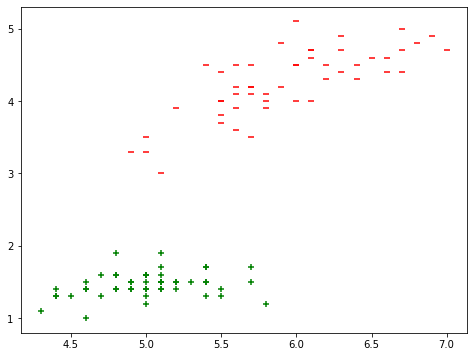

In [238]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [239]:
df = df.drop(labels = range(100,150), axis = 0)
df = df.drop(['sepal_width','petal_width'],axis=1)
# df = df.drop(df[100:], axis=0)
df

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
95,5.7,4.2,versicolor
96,5.7,4.2,versicolor
97,6.2,4.3,versicolor
98,5.1,3.0,versicolor


In [240]:
Y = []
target = df['species']
for val in target:
    if(val == 'setosa'):
        Y.append(0)
    else:
        Y.append(1)
        
df = df.drop(columns='species')
# X = df.values.tolist()
# X
df

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0


In [241]:
X = df.values.tolist()

In [242]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [243]:
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [244]:
print(x_test)
#10 values should be there

[[4.8 1.9]
 [5.3 1.5]
 [4.5 1.3]
 [5.4 1.5]
 [5.5 3.8]
 [5.8 1.2]
 [5.1 1.9]
 [5.1 1.4]
 [5.5 1.4]
 [4.4 1.3]]


In [245]:
print(y_train)

[0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0]


In [246]:
y_train = y_train.reshape(90,1)
# y_train [90x1]
y_test = y_test.reshape(10,1)

In [247]:
train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

In [248]:
train_f1 = train_f1.reshape(90,1)
# train_f1
train_f2 = train_f2.reshape(90,1)

In [249]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear', C=1)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0
